# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [40]:
df = pd.read_csv('train.csv')

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [41]:
train = df.sample(frac=0.7)
test = df.sample(frac=0.3)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [42]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [43]:
train, train_target = get_features_and_target(train)
test, test_target = get_features_and_target(test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

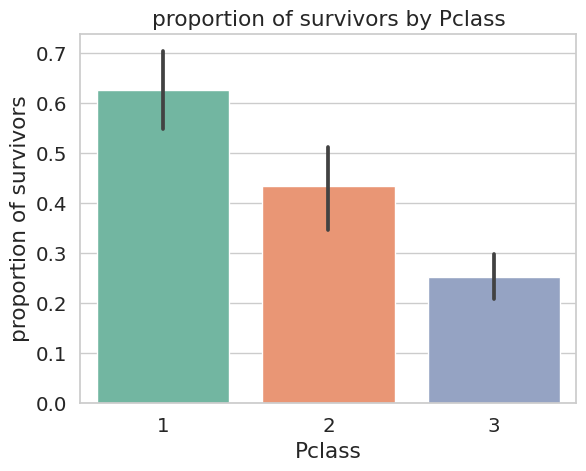

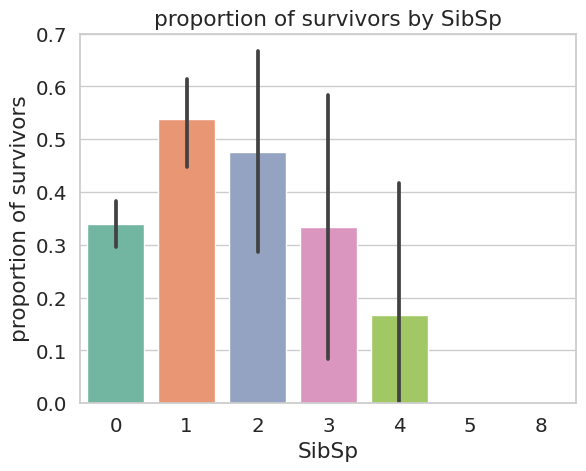

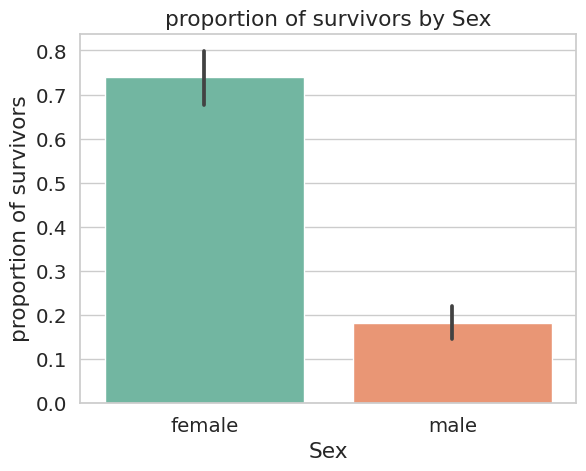

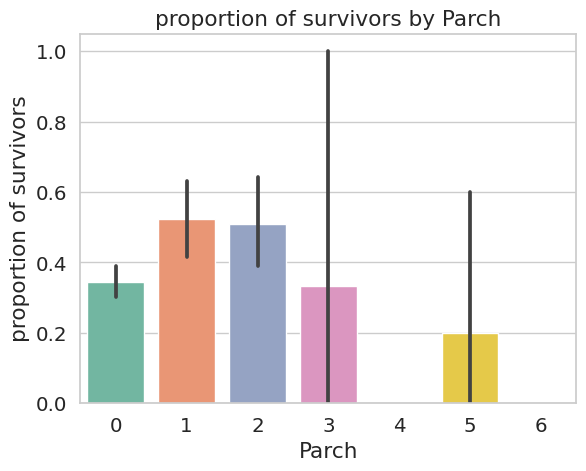

In [44]:
for feature in ["Pclass", "SibSp", "Sex", "Parch"]:
    sns.barplot(data=train, x=feature, y=train_target)
    plt.title('proportion of survivors by ' + feature)
    plt.xlabel(feature)
    plt.ylabel('proportion of survivors')
    plt.show()

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**
Если Sex == female то выжил, иначе нет.

**Дерево 2:**
Если Sex == female то выжил, иначе выжил, если SibSp + Parch <= 3.

Реализуйте полученные деревья по шаблону

In [45]:
def tree_1(features):
    predicted = pd.DataFrame({'Survived': []})
    for index, human in features.iterrows():
        if human.Sex == 'female':
            predicted.loc[index] = [True, ]
        else:
            predicted.loc[index] = [False, ]
    return predicted


def tree_2(features):
    predicted = pd.DataFrame({'Survived': []})
    for index, human in features.iterrows():
        if human.Sex == 'male':
            predicted.loc[index] = [False, ]
        else:
            predicted.loc[index] = [
                human.SibSp + human.Parch <= 3,
            ]
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.


In [46]:
print(df.Survived.sum() / len(df))

0.3838383838383838


**Критерий:**
Т.к. выжило ~ 38% пассажиров, я считаю адекватным критерием наличие > 62% правильных ответов.

In [47]:
def criteria(target, predicted):
    return (
        np.unique(target + predicted.T, return_counts=True)[1][0] +
        np.unique(target + predicted.T, return_counts=True)[1][2]
    ) / len(predicted)

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [48]:
print('first tree result: ', criteria(test_target, tree_1(test)))
print('second tree result:', criteria(test_target, tree_2(test)))

first tree result:  0.7827715355805244
second tree result: 0.7865168539325843


**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [49]:
def knn(features, train_features, train_target, k=1):
    predicted = pd.DataFrame({'Survived': []})
    for index, human in features.iterrows():
        k_n_n = train_features.copy(deep=True)
        k_n_n = k_n_n[k_n_n.index != index]
        if human.Sex:
            k_n_n = k_n_n[k_n_n.Sex == human.Sex]
        k_n_n = k_n_n.iloc[
            ((human.SibSp + human.Parch) - (k_n_n.SibSp + k_n_n.Parch)
             ).abs().argsort()[:k]
        ]
        cnt = 0
        for _index, _ in k_n_n.iterrows():
            cnt += train_target.loc[_index]
        predicted.loc[index] = [(cnt > k - cnt), ]

    return predicted

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

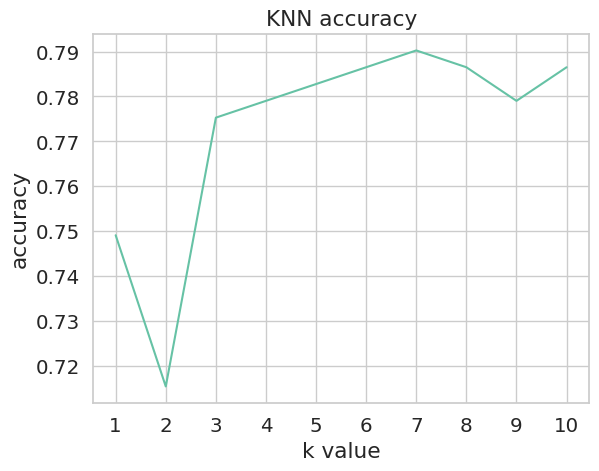

In [50]:
result = {}

for k in range(1, 11):
    result[k] = criteria(test_target, knn(test, train, train_target, k))

x, y = zip(*sorted(result.items()))
plt.plot(x, y)
plt.xticks(np.arange(min(x), max(x) + 1, 1.0))
plt.title('KNN accuracy')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

В данном промежутке для всех k значение точности примерно равно 0.75, оптимальным оказалось k=2. Таким образом, при правильном выборе k мы можем улучшить точность по сравнению с методом решающего дерева.

#### 6. Выводы

Проведенное исследование позволило научиться определять выжил пассажир, или нет, с неплохой точностью (относительно процента выживших) методом решающего дерева (около 80% попаданий), а также улучшить этот показатель методом KNN.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly import express as px
import matplotlib.pyplot as plt

yb = pd.read_csv('yelp_business.csv', index_col=0)
yb.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [52]:
top_cities = yb.copy(deep=True)
top_cities['num_of_companies'] = top_cities.state.transform(lambda x: 1)
top_cities = top_cities.groupby('city').agg({'num_of_companies': 'sum'}).sort_values(by='num_of_companies',
                                                                                     ascending=False).head(5)
top_cities

,num_of_companies
city,
Las Vegas,26775
Phoenix,17213
Toronto,17206
Charlotte,8553
Scottsdale,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [53]:
yb = yb[yb.city == 'Las Vegas']

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

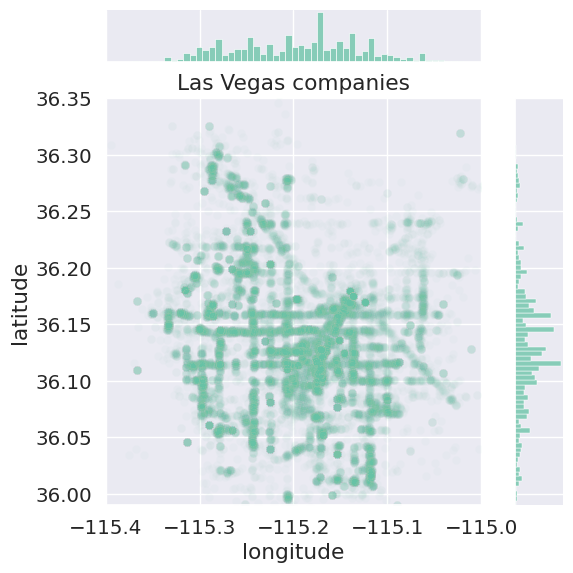

In [54]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    sns.jointplot(x=yb.longitude, y=yb.latitude, ylim=(35.99, 36.35),
                  xlim=(-115.4, -115), alpha=.03, space=.7)
    plt.title('Las Vegas companies')

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [ ]:
fig = px.scatter_mapbox(
    yb[(yb.latitude <= 36.35) & (yb.longitude <= -115) &
       (35.99 <= yb.latitude) & (-115.4 <= yb.longitude)],
    lat="latitude",
    lon="longitude",
    opacity=1,
    center=dict(lat=36.17, lon=-115.2),
    mapbox_style="stamen-terrain",
    title='Companies map'
)
fig.write_html('first_map.html')
fig.show()

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [56]:
yr = pd.read_csv('yelp_review.csv', index_col=0)

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [57]:
yr = yr.set_index('business_id')
yr = yr.loc[yr.index.intersection(yb.business_id)].reset_index()

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [58]:
yr = yr.groupby('business_id').aggregate([np.mean, np.size])

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [59]:
yr.rename(columns={'stars': 'business_rating'}, level=0, inplace=True)
yr.rename(columns={'mean': 'average_rating', 'size': 'number_of_ratings'}, level=1, inplace=True)
yr.columns = yr.columns.get_level_values(1)

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [60]:
yb.set_index('business_id', inplace=True)

In [61]:
ybr_base = yb.join(yr, on='business_id')[
    ['latitude', 'longitude', 'categories', 'name', 'average_rating', 'number_of_ratings']]

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [62]:
ybr_base = ybr_base[
    (ybr_base.latitude <= 36.35) &
    (ybr_base.longitude <= -115) &
    (35.99 <= ybr_base.latitude) &
    (-115.4 <= ybr_base.longitude)
    ]

In [ ]:
fig = px.scatter_mapbox(
    ybr_base,
    lat="latitude",
    lon="longitude",
    color='average_rating',
    opacity=0.3,
    center=dict(lat=36.17, lon=-115.2),
    mapbox_style="stamen-terrain",
    title='Rated companies map'
)

fig.write_html('second_map.html')
fig.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [63]:
ybr = ybr_base.copy(deep=True)

ybr.longitude = ybr.longitude.apply(lambda x: np.round(x * 4, decimals=1) * .25)
ybr.latitude = ybr.latitude.apply(lambda x: np.round(x * 4, decimals=1) * .25)

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

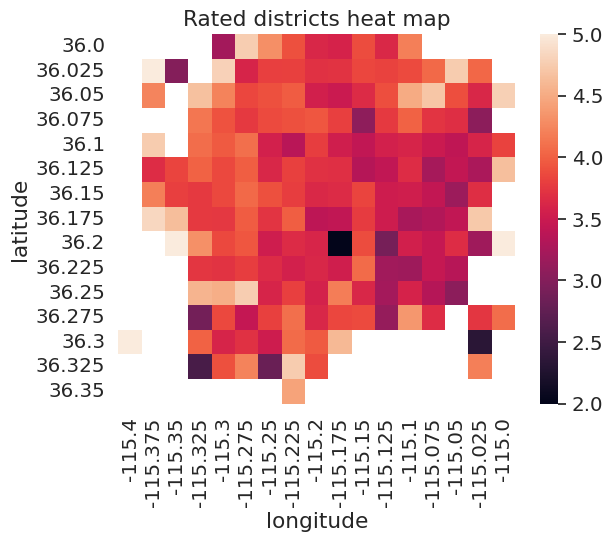

In [64]:
pt = pd.pivot_table(ybr, index='latitude', columns='longitude',
                    values='average_rating', aggfunc=np.mean)

plt.title('Rated districts heat map')
plt.xlabel('longitude')
plt.ylabel('latitude')

sns.heatmap(pt)
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 

1) Потому что небольшое количество данных порождает неверные выводы о районе (ну типо очев, что тут сказать).

2) Компании с рейтингом выше 4.5 (например) и так "хорошие", их можно красить в один цвет; аналогично <3 - все "плохие"

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

Text(42.25, 0.5, 'latitude')

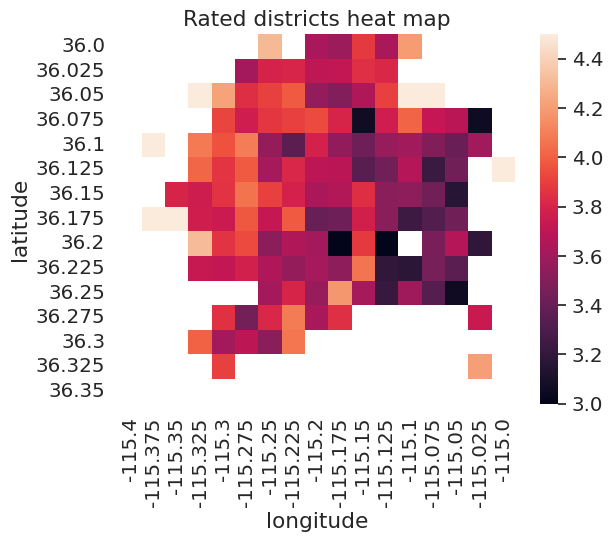

In [65]:
ybr_help = ybr.copy(deep=True).set_index(['latitude', 'longitude']
                                         ).count(axis='columns')
ybr_help = ybr_help.groupby(ybr_help.index).agg(data=np.sum)
ybr_help = ybr_help[ybr_help.data >= 30]

pt_ge30 = pt.copy(deep=True)

for i in pt.index:
    for j in pt.columns:
        if (i, j) not in ybr_help.index:
            pt_ge30.loc[i, j] = np.NaN

sns.heatmap(pt_ge30, mask=pt_ge30.isna(), vmin=3, vmax=4.5)
plt.title('Rated districts heat map')
plt.xlabel('longitude')
plt.ylabel('latitude')

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:**

Теперь мы имеем только данные, по которым можно судить о благопристойности района; график рейтингов стал более наглядным.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

Text(42.25, 0.5, 'latitude')

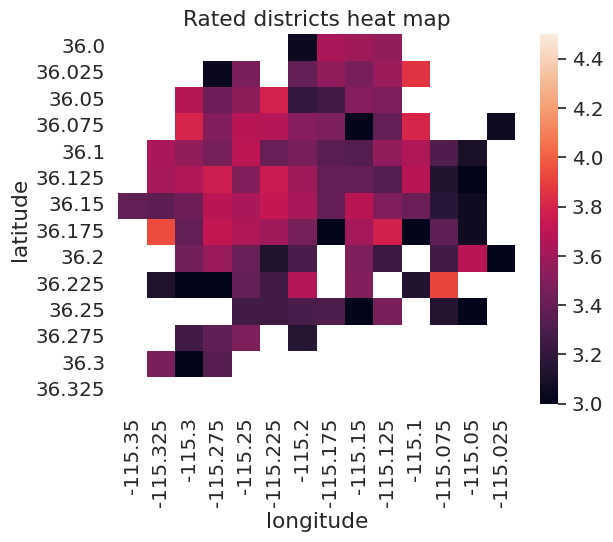

In [66]:
rest = ybr[ybr.categories.str.lower().str.contains('restaurant') &
           (ybr.number_of_ratings >= 5)]

rest_help = rest.copy(deep=True).set_index(['latitude', 'longitude']
                                           ).count(axis='columns')
rest_help = rest_help.groupby(rest_help.index).agg(data=np.sum)
rest_help = rest_help[rest_help.data >= 10]

rest_pt = pd.pivot_table(rest, index='latitude', columns='longitude',
                         values='average_rating', aggfunc=np.mean)

for i in rest_pt.index:
    for j in rest_pt.columns:
        if (i, j) not in rest_help.index:
            rest_pt.loc[i, j] = np.NaN

sns.heatmap(rest_pt, mask=rest_pt.isna(), vmin=3, vmax=4.5)
plt.title('Rated districts heat map')
plt.xlabel('longitude')
plt.ylabel('latitude')

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:**
Ограничение на количество отзывов нужно, чтобы исключить недавно открытые, еще толком не проверенные рестораны.
Ограничение на количество ресторанов нужно, потому что чем больше выборка, тем точнее рассчитывается среднйи рейтинг района, а нам именно он и нужен.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [30]:
rest = ybr_base[ybr_base.categories.str.lower().str.contains('restaurant') &
                (ybr_base.number_of_ratings >= 5)]

top_rest = rest[rest.number_of_ratings >= 50].sort_values(
    by='average_rating', ascending=False).set_index('name')

top_rest.head(10)

,latitude,longitude,categories,average_rating,number_of_ratings
name,,,,,
"""Lip Smacking Foodie Tours""",36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...,4.966480,179
"""Pepito Shack""",36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,4.907692,65
"""Bosa Boba Cafe""",36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,4.890909,55
"""Garden Grill""",36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...,4.868132,91
"""Brew Tea Bar""",36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,4.848069,1165
"""Poppa Naps BBQ""",36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,4.836538,104
"""Zenaida's Cafe""",36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes,4.833333,180
"""El Frescos Cocina Mexicana""",36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...,4.816754,191
"""Blaqcat Ultra Hookah Lounge""",36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...,4.809524,63


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [31]:
top_rest_for_map = top_rest.copy(deep=True)

top_rest_for_map['in_top'] = 0

for restaurant in top_rest.head(10).index:
    top_rest_for_map.loc[restaurant, 'in_top'] = 1

top_rest_for_map['in_top'] = top_rest_for_map['in_top'].astype(str)

In [ ]:
fig = px.scatter_mapbox(
    top_rest_for_map[top_rest_for_map.average_rating >= 4.7],
    lat="latitude",
    lon="longitude",
    color="in_top",
    size='number_of_ratings',
    opacity=1,
    center=dict(lat=36.17, lon=-115.2),
    mapbox_style="stamen-terrain",
    title='Best restaurants map',
)
fig.write_html('third_map.html')
fig.show()

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [415]:
rest = ybr_base[ybr_base.categories.str.lower().str.contains('restaurant') &
           (ybr_base.number_of_ratings >= 5)]

top_rest = rest[rest.number_of_ratings >= 50].sort_values(
    by='average_rating', ascending=False).set_index('name')

top_rest.head(10)

,latitude,longitude,categories,average_rating,number_of_ratings
name,,,,,
"""Lip Smacking Foodie Tours""",36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...,4.913043,69.0
"""Brew Tea Bar""",36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,4.855263,380.0
"""Zenaida's Cafe""",36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes,4.847222,72.0
"""Sushi Hiroyoshi Japanese Cuisine""",36.159942,-115.222234,Seafood;Sushi Bars;Restaurants;Japanese,4.846154,52.0
"""Le Petit Café & Bakery""",36.070752,-115.291919,Bakeries;Restaurants;French;Food;Cafes;Themed ...,4.823529,51.0
"""Meraki Greek Grill""",36.098578,-115.242440,Restaurants;Greek,4.823009,113.0
"""El Frescos Cocina Mexicana""",36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...,4.809524,63.0
"""Pressed For Juice""",36.075943,-115.298020,Juice Bars & Smoothies;Food;Organic Stores;Res...,4.800000,50.0
"""Art of Flavors""",36.151555,-115.152610,Food;Gelato;Restaurants;Ice Cream & Frozen Yog...,4.793103,116.0


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
top_rest_for_map = top_rest.copy(deep=True)

top_rest_for_map['in_top'] = 0

for restaurant in top_rest.head(10).index:
  top_rest_for_map.loc[restaurant, 'in_top'] = 1

top_rest_for_map['in_top'] = top_rest_for_map['in_top'].astype(str)

fig = px.scatter_mapbox(
    top_rest_for_map[top_rest_for_map.average_rating >= 4.7],
    lat="latitude",
    lon="longitude",
    color="in_top",
    size='number_of_ratings',
    opacity=1,
    center=dict(lat=36.17, lon=-115.2),
    mapbox_style="stamen-terrain",
    title='Best restaurants map',
)

fig.write_html('third_map.html')
fig.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий тот еще гурман. По поводу задачи - мы прошли долгий и нелегкий путь от вывода всех компаний на карте Лас Вегаса до отображения топ ресторанов этого города, при этом стало заметно насколько мало в городе высоко оцененных ресторанов и в целом районов.